In [149]:
import pandas as pd
import numpy as np
import unidecode
import seaborn as sns
import re

In [184]:
# importar os dados csv para pandas dataframe
cvd_2020_1 = pd.read_csv('dados/2020_1.csv',delimiter=';')
cvd_2021_1 = pd.read_csv('dados/2021_1.csv',delimiter=';')
cvd_2022_1 = pd.read_csv('dados/2022_1.csv',delimiter=';')

#### Explorando e Tratando os Dados da Covid do período 2020.1

In [118]:
len(cvd_2020_1)

714568

In [119]:
len(cvd_2021_1)

1017220

In [120]:
len(cvd_2022_1)

516950

In [121]:
# identificar porcentagem dos valores propriamente categorizados como NaN para cada coluna
for collumn in list(cvd_2020_1.columns):
    porcentagem = ((cvd_2020_1[collumn].isna().sum()/len(cvd_2020_1[collumn]))*100)
    print(collumn,": ",porcentagem)

regiao :  0.0
estado :  0.0
municipio :  0.0
coduf :  0.0
codmun :  0.0
codRegiaoSaude :  0.0
nomeRegiaoSaude :  0.0
data :  0.0
semanaEpi :  0.0
populacaoTCU2019 :  0.0
casosAcumulado :  0.0
casosNovos :  0.0
obitosAcumulado :  0.0
obitosNovos :  0.0
Recuperadosnovos :  0.0
emAcompanhamentoNovos :  0.0
interior/metropolitana :  1.0045230125054578


**Foi identificado valores faltantes na variável 'interior/metropolitana', sendo esses preenchidos com valor NaN. Para resolver isso, será realizado imputação de valores com base na variável município, ou seja, se a cidade localizada na variável for do interior a variável 'interior/metropolitana' receberá 0 senão receberá 1. Abaixo segue a lista das cidades metrópoles mapeadas visando identificar no dataset as mesmas, sendo que para isso será feita transformações no dado em relação a formatação das strings**

In [122]:
metropolitanas = ['Goiânia','Cuiabá','Macapá','Manaus','Belém','Santarém','Porto Velho','Boa Vista',
                  'Caracaraí','Caroebe','Palmas','Gurupi','Vitória','Belo Horizonte','Rio de Janeiro',
                  'Santos','Campinas','Jundiaí','Piracicaba','Ribeirão Preto','São José do Rio Preto',
                  'São Paulo','Sorocaba','São José dos Campos','Arapiraca','São Miguel dos Campos',
                  'Maceió','Santana do Ipanema','Palmeira dos Índios','Penedo','Delmiro Gouveia',
                  'Viçosa','União dos Palmares','Feira de Santana','Salvador','Juazeiro do Norte',
                  'Fortaleza','Sobral','São Luís','Imperatriz','Araruna','Barra de Santa Rosa',
                  'Cajazeiras','Campina Grande','Esperança','Guarabira','Itabaiana','João Pessoa',
                  'Patos','Sousa','Mamanguape','Piancó','Recife','Natal','Aracaju','Apucarana',
                  'Campo Mourão','Cascavel','Curitiba','Londrina','Maringá','	Toledo','Umuarama',
                  'Rio do Sul','Criciúma','Chapecó','Joaçaba','São Miguel do Oeste','Florianópolis',
                  'Itajaí','Lages','Joinville','Tubarão','Blumenau','Porto Alegre','Caxias do Sul']
for value in range(len(metropolitanas)):
    metropolitanas[value] = re.sub('\W+','',unidecode.unidecode(metropolitanas[value].lower()))

**Abaixo será verificado qual valor binário da variável 'interior/metropolitana' está associado a cidades metropolitanas, para isso utilizamos uma amostra do dataset somente de cidades metropolitanas selecionadas, se a divisão da soma dos valores da viaríavel 'interior/metropolitana' pelo tamanho da amostra for igual a 1, iremos inferir 1 a todos os valores onde o município se localize em zona metropolitana**

In [123]:
# identificamos que 1 é para metrópoles e 0 para cidades do interior
count_metropolis = cvd_2020_1[(cvd_2020_1['municipio'] == 'Salvador') | (cvd_2020_1['municipio'] == 'São Paulo') | (cvd_2020_1['municipio'] == 'Goiânia')]
len(count_metropolis['interior/metropolitana']) == count_metropolis['interior/metropolitana'].sum()

True

**Aqui será criado um novo atributo com base na variável 'municipio', removendo a ascentuação, removendo espaços e transoformando os caracteres para minúsculos, pois iremos fazer algumas comparações com a lista de metrópoles acima para imputação dos valores faltantes na variável 'interior/metropolitana'**

In [124]:
cvd_2020_1['temp_municipio'] = cvd_2020_1['municipio'].str.lower()
cvd_2020_1['temp_municipio'] = [re.sub('\W+','',unidecode.unidecode(value)) for value in cvd_2020_1['temp_municipio']] 

**Aqui de fato fazemos a imputação nos valores faltantes levando em consideração o tipo de município e a lista que foi criada com as nomenclaturas das metrópoles**

In [125]:
cvd_2020_1['interior/metropolitana'] = np.where((np.isnan(cvd_2020_1['interior/metropolitana'])) & ~(cvd_2020_1['temp_municipio'].isin(metropolitanas)),0,cvd_2020_1['interior/metropolitana'])
cvd_2020_1['interior/metropolitana'] = np.where((np.isnan(cvd_2020_1['interior/metropolitana'])) & (cvd_2020_1['temp_municipio'].isin(metropolitanas)),1,cvd_2020_1['interior/metropolitana'])

In [126]:
# Remoção do atributo 'temp_municipio'
cvd_2020_1.drop('temp_municipio',axis = 1, inplace=True)
cvd_2020_1.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,0,0,76,0,0,0,2020-02-25,9,210147125,0,0,0,0,0,0,0.0
1,Brasil,0,0,76,0,0,0,2020-02-26,9,210147125,1,1,0,0,1,0,0.0
2,Brasil,0,0,76,0,0,0,2020-02-27,9,210147125,1,0,0,0,1,0,0.0
3,Brasil,0,0,76,0,0,0,2020-02-28,9,210147125,1,0,0,0,0,1,0.0
4,Brasil,0,0,76,0,0,0,2020-02-29,9,210147125,2,1,0,0,1,1,0.0


In [127]:
cvd_2020_1['populacaoTCU2019'].value_counts()

0        2667
5237      635
4573      508
3203      508
11019     508
         ... 
5714      127
13865     127
31603     127
20598     127
5821      127
Name: populacaoTCU2019, Length: 5105, dtype: int64

**Apesar de realizarmos o tratamento dos valores NaN, foi identificado que alguns atributos possuem valores faltantes preenchidos com o valor 0, pensando nisso, foi mapeado e analisado em percentual a quantidade de valores faltantes do nosso dataset**

In [128]:
populacaoTCU2019 = (len(cvd_2020_1.query("populacaoTCU2019 == 0")) / len(cvd_2020_1)) * 100
municipio = (len(cvd_2020_1.query("municipio == '0'")) / len(cvd_2020_1)) * 100
estado = (len(cvd_2020_1.query("estado == '0'")) / len(cvd_2020_1)) * 100
codRegiaoSaude = (len(cvd_2020_1.query("codRegiaoSaude == 0")) / len(cvd_2020_1)) * 100
nomeRegiaoSaude = (len(cvd_2020_1.query("nomeRegiaoSaude == '0'")) / len(cvd_2020_1)) * 100

print(populacaoTCU2019, municipio, estado, codRegiaoSaude, nomeRegiaoSaude)

0.37323249851658624 1.0045230125054578 0.03428644999496199 1.0045230125054578 1.0045230125054578


**Com base nas porcentagens das variáveis analisadas acima, iremos substituir o valor 0 por 'Não informado' nos atributos categóricos e nos valores contínuos manteremos no mesmo formato, pois a remoção dos registros acabam impactando na remoção de valores de outras variáveis com maior relevância na análise**

In [129]:
cvd_2020_1['municipio'].replace('0','Não Informado',inplace=True)
cvd_2020_1['estado'].replace('0','Não Informado',inplace=True)
cvd_2020_1['nomeRegiaoSaude'].replace('0','Não Informado',inplace=True)
cvd_2020_1.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,Não Informado,Não Informado,76,0,0,Não Informado,2020-02-25,9,210147125,0,0,0,0,0,0,0.0
1,Brasil,Não Informado,Não Informado,76,0,0,Não Informado,2020-02-26,9,210147125,1,1,0,0,1,0,0.0
2,Brasil,Não Informado,Não Informado,76,0,0,Não Informado,2020-02-27,9,210147125,1,0,0,0,1,0,0.0
3,Brasil,Não Informado,Não Informado,76,0,0,Não Informado,2020-02-28,9,210147125,1,0,0,0,0,1,0.0
4,Brasil,Não Informado,Não Informado,76,0,0,Não Informado,2020-02-29,9,210147125,2,1,0,0,1,1,0.0


#### Explorando e Tratando os Dados da Covid do período 2021.1

In [130]:
cvd_2021_1.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-01,53,210147125.0,7700578.0,24605,195411,462,6747065.0,733959.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-01,53,210147125.0,7700578.0,0,195411,0,6756284.0,748883.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-02,53,210147125.0,7716405.0,15827,195725,314,6756284.0,748883.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-02,53,210147125.0,7716405.0,0,195725,0,6769420.0,751260.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-03,1,210147125.0,7733746.0,17341,196018,293,6769420.0,751260.0,NaN


**Após analisar os valores faltantes dos atributos do dataset identificamos duas variáveis com valores ausentes excessivos são a 'Recuperadosnovos' e a 'emAcompanhamentoNovos', devido a abordagem considerada é a de remoção desses atributos do dataset. Além disso, todas as variáveis que possuem valores ausentes, é feito um análise considicional para remoção desses valores nas mesmas**

In [131]:
# Identificação do percentual dos valores ausentes em cada atributo
for collumn in list(cvd_2021_1.columns):
    porcentagem = ((cvd_2021_1[collumn].isna().sum()/len(cvd_2021_1[collumn]))*100)
    print(collumn,": ",porcentagem)

regiao :  0.0
estado :  0.03558718861209965
municipio :  0.8896797153024912
coduf :  0.0
codmun :  0.5160142348754448
codRegiaoSaude :  0.8896797153024912
nomeRegiaoSaude :  0.8896797153024912
data :  0.0
semanaEpi :  0.0
populacaoTCU2019 :  0.3736654804270463
casosAcumulado :  0.0
casosNovos :  0.0
obitosAcumulado :  0.0
obitosNovos :  0.0
Recuperadosnovos :  99.9644128113879
emAcompanhamentoNovos :  99.9644128113879
interior/metropolitana :  0.8896797153024912


In [132]:
cvd_2021_1.drop(['Recuperadosnovos', 'emAcompanhamentoNovos'], inplace=True ,axis=1)
cvd_2021_1 = cvd_2021_1[(cvd_2021_1['interior/metropolitana'] != np.nan) 
                        & (cvd_2021_1['populacaoTCU2019'] != np.nan) 
                        & (cvd_2021_1['nomeRegiaoSaude'] != np.nan)
                        & (cvd_2021_1['codRegiaoSaude'] != np.nan)
                        & (cvd_2021_1['codmun'] != np.nan)
                        & (cvd_2021_1['municipio'] != np.nan)
                        & (cvd_2021_1['estado'] != np.nan)]

**Acima é percebido que apesar da tentativa de remoção dos registros com valores NaN de todas as variáveis mapeadas, a resolução não possuiu efeito prático, pensando nisso, faremos o mesmo processo de imputação para a variável 'interior/metropolitana' e nas demais iremos imputar valores que identifiquem informações faltantes, assim poderemos separar as mesmas em nossa análise, mas antes de realizarmos iremos ver a viabilidade da estratégia, visando saber se há de fato possibilidade de relacionar as informações de uma variável com outra**

In [133]:
# Identificação do percentual dos valores ausentes em cada atributo
for collumn in list(cvd_2021_1.columns):
    porcentagem = ((cvd_2021_1[collumn].isna().sum()/len(cvd_2021_1[collumn]))*100)
    print(collumn,": ",porcentagem)

regiao :  0.0
estado :  0.03558718861209965
municipio :  0.8896797153024912
coduf :  0.0
codmun :  0.5160142348754448
codRegiaoSaude :  0.8896797153024912
nomeRegiaoSaude :  0.8896797153024912
data :  0.0
semanaEpi :  0.0
populacaoTCU2019 :  0.3736654804270463
casosAcumulado :  0.0
casosNovos :  0.0
obitosAcumulado :  0.0
obitosNovos :  0.0
interior/metropolitana :  0.8896797153024912


In [134]:
len(cvd_2021_1[(pd.isna(cvd_2021_1['interior/metropolitana'])) & ~(pd.isna(cvd_2021_1['municipio']))])

0

**No dataset 'cvd_2020_1' foi utilizado uma técnica de imputação de valores para a variável 'interior/metropolitana' 'municipio', contudo não iremos utilizar a mesma abordagem nesse, pois como foi apresentado acima todos os registros de 'interior/metropolitana' que possuem dados NaN também possuem dados NaN na variável 'municipio', impossibilitando fazermos qualquer relação entre dados**

In [137]:
#Imputação de valores sintéticos para identificação de valores faltantes no dataset
cvd_2021_1['estado'].replace(np.nan,"Não Informado", inplace=True)
cvd_2021_1['municipio'].replace(np.nan,"Não Informado", inplace=True)
cvd_2021_1['nomeRegiaoSaude'].replace(np.nan,"Não Informado", inplace=True)
cvd_2021_1['interior/metropolitana'].replace(np.nan,-1,inplace=True)
cvd_2021_1['codmun'].replace(np.nan,-1,inplace=True)
cvd_2021_1['codRegiaoSaude'].replace(np.nan,-1,inplace=True)
cvd_2021_1['populacaoTCU2019'].replace(np.nan,-1,inplace=True)
cvd_2021_1['interior/metropolitana'].replace(np.nan,-1,inplace=True)
cvd_2021_1.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana
0,Brasil,Não Informado,Não Informado,76,-1.0,-1.0,Não Informado,2021-01-01,53,210147125.0,7700578.0,24605,195411,462,-1.0
1,Brasil,Não Informado,Não Informado,76,-1.0,-1.0,Não Informado,2021-01-01,53,210147125.0,7700578.0,0,195411,0,-1.0
2,Brasil,Não Informado,Não Informado,76,-1.0,-1.0,Não Informado,2021-01-02,53,210147125.0,7716405.0,15827,195725,314,-1.0
3,Brasil,Não Informado,Não Informado,76,-1.0,-1.0,Não Informado,2021-01-02,53,210147125.0,7716405.0,0,195725,0,-1.0
4,Brasil,Não Informado,Não Informado,76,-1.0,-1.0,Não Informado,2021-01-03,1,210147125.0,7733746.0,17341,196018,293,-1.0


In [138]:
# Identificação do percentual dos valores ausentes em cada atributo após tratamento
for collumn in list(cvd_2021_1.columns):
    porcentagem = ((cvd_2021_1[collumn].isna().sum()/len(cvd_2021_1[collumn]))*100)
    print(collumn,": ",porcentagem)

regiao :  0.0
estado :  0.0
municipio :  0.0
coduf :  0.0
codmun :  0.0
codRegiaoSaude :  0.0
nomeRegiaoSaude :  0.0
data :  0.0
semanaEpi :  0.0
populacaoTCU2019 :  0.0
casosAcumulado :  0.0
casosNovos :  0.0
obitosAcumulado :  0.0
obitosNovos :  0.0
interior/metropolitana :  0.0


**Explorando e Tratando os Dados da Covid do período 2022.1**

In [139]:
cvd_2022_1.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0,NaN


In [148]:
# Identificação do percentual dos valores ausentes em cada atributo
for collumn in list(cvd_2022_1.columns):
    porcentagem = ((cvd_2022_1[collumn].isna().sum()/len(cvd_2022_1[collumn]))*100)
    print(collumn,": ",porcentagem)

regiao :  0.0
estado :  0.0
municipio :  0.0
coduf :  0.0
codmun :  0.0
codRegiaoSaude :  0.0
nomeRegiaoSaude :  0.0
data :  0.0
semanaEpi :  0.0
populacaoTCU2019 :  0.0
casosAcumulado :  0.0
casosNovos :  0.0
obitosAcumulado :  0.0
obitosNovos :  0.0
interior/metropolitana :  0.0


**Assim como no dataset 'cvd_2021_1' iremos fazer a remoção das variáveis 'Recuperadosnovos' e 'emAcompanhamentoNovos' devido a alta incidências de valores NaN e abaixo será removido todos os registros onde os valores ausentes apareçam em todas as variáveis mapeadas**

In [142]:
cvd_2022_1.drop(['Recuperadosnovos', 'emAcompanhamentoNovos'], inplace=True ,axis=1)
cvd_2022_1 = cvd_2022_1[(cvd_2022_1['interior/metropolitana'] != np.nan) 
                        & (cvd_2022_1['populacaoTCU2019'] != np.nan) 
                        & (cvd_2022_1['nomeRegiaoSaude'] != np.nan)
                        & (cvd_2022_1['codRegiaoSaude'] != np.nan)
                        & (cvd_2022_1['codmun'] != np.nan)
                        & (cvd_2022_1['municipio'] != np.nan)
                        & (cvd_2022_1['estado'] != np.nan)]

**Abaixo é feita a checagem para saber se existe uma relação direta dos valores NaN da variável 'interior/metropolitana' e da variável 'municipio', contudo ao aalisar o resultado podemos ver que para todos os valores NaN de 'interior/metropolitana' o respectivo valor em 'municipio' também é NaN, impossibilitando em fazer qualquer associação para imputação**

In [146]:
len(cvd_2022_1[(pd.isna(cvd_2022_1['interior/metropolitana'])) & ~(pd.isna(cvd_2022_1['municipio']))])

0

In [147]:
#Imputação de valores sintéticos para identificação de valores faltantes no dataset
cvd_2022_1['estado'].replace(np.nan,"Não Informado", inplace=True)
cvd_2022_1['municipio'].replace(np.nan,"Não Informado", inplace=True)
cvd_2022_1['nomeRegiaoSaude'].replace(np.nan,"Não Informado", inplace=True)
cvd_2022_1['codmun'].replace(np.nan,-1,inplace=True)
cvd_2022_1['codRegiaoSaude'].replace(np.nan,-1,inplace=True)
cvd_2022_1['populacaoTCU2019'].replace(np.nan,-1,inplace=True)
cvd_2022_1['interior/metropolitana'].replace(np.nan,-1,inplace=True)
cvd_2022_1.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,interior/metropolitana
0,Brasil,Não Informado,Não Informado,76,-1.0,-1.0,Não Informado,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,-1.0
1,Brasil,Não Informado,Não Informado,76,-1.0,-1.0,Não Informado,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,-1.0
2,Brasil,Não Informado,Não Informado,76,-1.0,-1.0,Não Informado,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,-1.0
3,Brasil,Não Informado,Não Informado,76,-1.0,-1.0,Não Informado,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,-1.0
4,Brasil,Não Informado,Não Informado,76,-1.0,-1.0,Não Informado,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,-1.0


### Análise e tratamento dos Dados (Parte 2)

**Análise comparativa dos 1000 primeiros registros de óbtos novos dos datasets**

<AxesSubplot:>

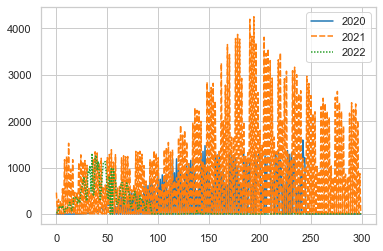

In [183]:
sns.set_theme(style="whitegrid")

data = pd.DataFrame(data={'2020': cvd_2020_1['obitosNovos'].head(300),
                         '2021': cvd_2021_1['obitosNovos'].head(300),
                         '2022': cvd_2022_1['obitosNovos'].head(300)})
sns.lineplot(data=data, palette="tab10")


**Analisando graficamente é perceptível que a escala compromete a análise, pensando nisso o próximo passo será normalizar as variáveis quantitativas de ambos os datasets visando melhor visualização**